<a href="https://colab.research.google.com/github/hyp3r5pace/Machine-learning-lab/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Roll no: 1801176**
# **Name: Soumyajit Deb**

# **Question 1**

# **SOM clustering from scratch**

In [ ]:
# importing libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
import warnings
import math
import copy

# to prevent ipython from priniting any warning
warnings.filterwarnings('ignore')

In [ ]:
# load the iris dataset

iris = datasets.load_iris()

# loading the feature sample dataset into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
# defining the self organising map (SOM)

class SOM_Clustering:
  def __init__(self, numberOfNodes, learningRate):
    self.learningRate = learningRate
    self.numberOfNodes = numberOfNodes
    self.weights = None

  # function for randomly intializing the weights of the nodes in the map
  # each node represents a cluster center in the input space
  # for avoiding the problem of division by 0 (formation of less number of clusters than needed), we randomly intialize with one of the points in input space
  def initializeWeights(self, inputSpace):
    index = [i for i in range(len(inputSpace))]
    self.weights = []
    for i in range(self.numberOfNodes):
      random.seed(i)
      randIndex = random.sample(index, 20)
      self.weights.append(copy.deepcopy(inputSpace[randIndex[random.choice([x for x in range(18)])]]))
    return self.weights


  # function to compute the best matching unit (BMU) from the map for the given input
  def getBMU(self, input):
    min_node, min_dist = 0, float('Inf')
    for i in range(len(self.weights)):
        temp = [(x1 - x2) ** 2 for (x1,x2) in zip(self.weights[i], input)]
        totalSum = sum(temp)
        dist = totalSum ** 0.5
        if (dist < min_dist):
          min_dist = dist
          min_node = i
    return min_node
  
  # function to move the BMU closer to the input by changing the weights.
  # in this case, neighbour radius is 0 since for clustering SOM has a neighbour radius 0 as each node represents a cluster center
  # and it doesn't make sense to move other cluster centers closer to a point in different cluster
  # neighbour radius > 0 in SOM for other cases such as space approximation, input space visualisation etc.
  def update_weight(self, input, min_node):
    for i in range(len(self.weights[min_node])):
      self.weights[min_node][i] += self.learningRate * (input[i] - self.weights[min_node][i])
  
  # function to perform the clustering
  # unlike k-means, clustering using SOM doesn't have a convergence criteria since for every input, the cluster center or node will be changed or updated
  def cluster(self, iterations, inputSpace):
    iter = 0
    while (iter <= iterations):
      for i in range(len(inputSpace)):
        loc = self.getBMU(inputSpace[i])
        self.update_weight(inputSpace[i], loc)
      iter += 1

  # function to display the final cluster centers
  def showClusterCenters(self):
    for i in range(self.numberOfNodes):
        print(self.weights[i])

  
  # function to compute euclidean distance between two points
  def calcDistance(self, point_a, point_b):
    temp = [(x1 - x2) ** 2 for (x1,x2) in zip(point_a, point_b)]
    dist = np.sqrt(sum(temp))
    return dist

  # function to compute the sihouette score of the current clustering
  def silhoutteScore(self, inputSpace):
    # forming a cluster wise list of inputspace
    cluster_assigned = [[] for i in range(self.numberOfNodes)]
    for i in range(len(inputSpace)):
      index = self.getBMU(inputSpace[i])
      cluster_assigned[index].append(inputSpace[i])

    silhoutte_score_list = []

    for i in range(len(inputSpace)):
      # compute the intra cluster distance
      index = self.getBMU(inputSpace[i])
      sum = 0
      for j in range(len(cluster_assigned[index])):
        sum += self.calcDistance(inputSpace[i], cluster_assigned[index][j])
      if (len(cluster_assigned[index]) > 1):
        avg_intra_cluster_dist = sum / (len(cluster_assigned[index]) - 1)
      else:
        avg_intra_cluster_dist = 0.0

      # compute the average inter cluster distance w.r.t nearest cluster
      min_avg_inter_cluster_dist = float('Inf')
      index1 = 0
      for j in range(len(cluster_assigned)):
        if (j != index):
          sum = 0
          for k in range(len(cluster_assigned[j])):
            sum += self.calcDistance(inputSpace[i], cluster_assigned[j][k])
          avg = sum / len(cluster_assigned[j])
          if (avg < min_avg_inter_cluster_dist):
            index1 = j
            min_avg_inter_cluster_dist = avg

      silhoutte_score = (min_avg_inter_cluster_dist - avg_intra_cluster_dist) / max(min_avg_inter_cluster_dist, avg_intra_cluster_dist)
      silhoutte_score_list.append(silhoutte_score)
    return (math.fsum(silhoutte_score_list) / len(silhoutte_score_list))

In [ ]:
# creating a instance of the SOM
cluster_silhoutte_score = []
for x in range(2, 20):
  print('Number of clusters %d' %(x))
  clustering = SOM_Clustering(x, 0.05)
  print('Initial cluster centers:')
  print(clustering.initializeWeights(df.values.tolist()))

  # performing clustering on the iris dataset
  clustering.cluster(5000, df.values.tolist())

  # printing the final cluster weight
  print('\n\nThe final cluster centers are:')
  print(clustering.weights)

  print('\nSilhoutte score of current clustering is:')
  silhoutte_score = clustering.silhoutteScore(df.values.tolist())
  cluster_silhoutte_score.append(silhoutte_score)
  print(silhoutte_score)

  print('\n\n')

Number of clusters 2
Initial cluster centers:
[[5.6, 3.0, 4.5, 1.5], [4.8, 3.4, 1.9, 0.2]]


The final cluster centers are:
[[6.501916929754613, 2.9870936332127624, 5.372960056965866, 1.9920834672075947], [4.978712179023518, 3.352988404739799, 1.5635378214821938, 0.29197288152932704]]

Silhoutte score of current clustering is:
0.67723079175477



Number of clusters 3
Initial cluster centers:
[[5.6, 3.0, 4.5, 1.5], [4.8, 3.4, 1.9, 0.2], [6.5, 3.2, 5.1, 2.0]]


The final cluster centers are:
[[5.880535055269213, 2.738531440801766, 4.564841509282503, 1.551065440349464], [4.983200260615011, 3.4073267519851593, 1.4645266641948187, 0.2516019565199126], [6.791198027531217, 3.093219558064005, 5.66612712375138, 2.116645696449634]]

Silhoutte score of current clustering is:
0.5515631790182418



Number of clusters 4
Initial cluster centers:
[[5.6, 3.0, 4.5, 1.5], [4.8, 3.4, 1.9, 0.2], [6.5, 3.2, 5.1, 2.0], [6.9, 3.1, 5.4, 2.1]]


The final cluster centers are:
[[5.512057312733237, 2.652609856958

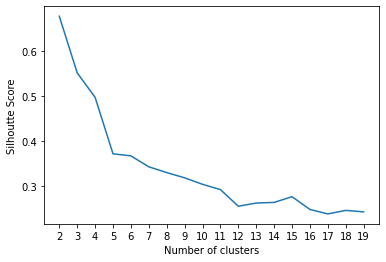

In [ ]:
plt.plot([x for x in range(2, 20)], cluster_silhoutte_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.xticks([x for x in range(2, 20)])
plt.show()

# **Question 2**
# **SOM clustering using in-built function**

In [ ]:
silhoutte_score_list = []

from minisom import MiniSom
for x in range(2, 20):
  som = MiniSom(x,1,4, sigma = 0.7, learning_rate=0.03)
  som.train(df.values.tolist(), 500)
  cluster_centers = []
  for point in df.values.tolist():
    cluster_centers.append(som.winner(point))
  
  label = [x1 for (x1,x2) in cluster_centers]

  silhoutte_score_list.append(metrics.silhouette_score(df.values.tolist(), label, metric='euclidean'))

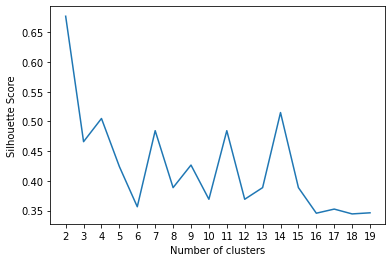

In [ ]:
plt.plot([x for x in range(2, 20)], silhoutte_score_list)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks([x for x in range(2, 20)])
plt.show()

# **Question 3**

# **K-mean clustering**

In [ ]:
# function to calculate the distance between  two points
def calcDistance(point_a, point_b):
  # using euclidian distance
  sum = 0
  for i in range(len(point_a)):
    sum += (point_a[i] - point_b[i]) ** 2
  return math.sqrt(sum)

# function to assign cluster to datapoints on the basis of a set of centroids
def assignCluster(centroidPoints, dataPoints):
  assignedCluster = [None for i in range(len(dataPoints))]
  for i in range(len(dataPoints)):
    min, temp = float('Inf'), 0
    for j in range(len(centroidPoints)):
      dist = calcDistance(centroidPoints[j], dataPoints[i])
      if (dist < min):
        min = dist
        temp = j
    assignedCluster[i] = temp
  
  return assignedCluster

# function to calculate new centroid points on the basis of average of points assgined to each cluster
def calcNewCentroid(assignedCluster, dataPoints, k):
  newCentroids = []
  for i in range(k):
    sum, count = [0, 0, 0, 0], 0
    #print(assignedCluster)
    for j in range(len(assignedCluster)):
      if (assignedCluster[j] == i):
        sum = [sum[p] + dataPoints[j][p] for p in range(4)]
        count += 1
    newCentroids.append([(sum[p] / count) for p in range(4)])
  return newCentroids

# function to perform the K-Mean Clustering
def kMeanClustering(startingPoint, dataPoints):
  # assigning cluster to the data points
  assignedCluster = assignCluster(startingPoint, dataPoints)

  oldCentroids = copy.deepcopy(startingPoint)
  # computing the new centroid points by finding the average of all the points in the cluster
  newCentroids = calcNewCentroid(assignedCluster, dataPoints, len(startingPoint))
  
  # assigning cluster points according to thew newly computed centroid points
  newAssignedCluster = assignCluster(newCentroids, dataPoints)
  
  # loop to keep evaluating new cnetroid and cluster assignment until no change
  while (True):
    change = 0
    for val in zip(assignedCluster, newAssignedCluster):
      if (val[0] != val[1]):
        change = 1
        break
    
    if (change == 0): break

    # compute the new centroid points
    oldCentroids = newCentroids
    newCentroids = calcNewCentroid(newAssignedCluster, dataPoints, len(oldCentroids))

    # compute the new cluster assignment for the new centroid points
    assignedCluster = newAssignedCluster
    newAssignedCluster = assignCluster(newCentroids, dataPoints)

  return newCentroids

# the K mean score we are considering is the average intra cluster distance for a certain value of k and set of centroids
def clusterEvaluation(centroids, dataPoints):
  # assign the cluster to each of the datapoints on the basis of the centroid
  assignedCluster = assignCluster(centroids, dataPoints)

  interClusterDistSum = [0 for i in range(len(centroids))]

  for i in range(len(assignedCluster)):
    interClusterDistSum[assignedCluster[i]] += calcDistance(centroids[assignedCluster[i]], dataPoints[i])
  
  return sum(interClusterDistSum) / len(interClusterDistSum)  # it returns the k mean score of a cluster

In [ ]:
# converting the panadas dataframe to list
dataPoints = df.values.tolist()

# initializing the value of k with 2
k =  2
index = [i for i in range(150)]
efficient_centroid = [0 for i in range(18)]
best_k_cluster_metrics = [0 for i in range(18)]
while (k <= 19):
  # generating 15 different sets of starting points for the certain value of k
  starting_points = []
  for i in range(15):
    temp = []
    for j in range(k):
      random.seed(j + k)
      randIndex = random.sample(index, 18)
      temp.append(copy.deepcopy(dataPoints[randIndex[random.choice([x for x in range(18)])]]))
    starting_points.append(temp)
  
  clusteringMetrics = []
  centroid_list = []
  for i in range(15):
    #print(starting_points[i])
    centroidPoints = kMeanClustering(starting_points[i], dataPoints)
    centroid_list.append(centroidPoints)
    clusteringMetrics.append(clusterEvaluation(centroidPoints, dataPoints))
  
  # finding the best starting point for each k value
  min, temp = float('Inf'), 0
  for i in range(len(clusteringMetrics)):
    if (clusteringMetrics[i] < min):
      min = clusteringMetrics[i]
      temp = i
  
  efficient_centroid[k-2] = centroid_list[temp]
  best_k_cluster_metrics[k-2] = clusteringMetrics[temp] 

  k += 1

In [ ]:
silhoutte_score_list = []

def assignCluster(input, centroid_list):
  min_node, min_dist = 0, float('Inf')
  for i in range(len(centroid_list)):
    temp = [(x1 - x2) ** 2 for (x1,x2) in zip(centroid_list[i], input)]
    totalSum = sum(temp)
    dist = totalSum ** 0.5
    if (dist < min_dist):
      min_dist = dist
      min_node = i
  return min_node

for i in range(len(efficient_centroid)):
  label = []
  for inputs in df.values.tolist():
    label.append(assignCluster(inputs, efficient_centroid[i]))
  silhoutte_score_list.append(metrics.silhouette_score(df.values.tolist(), label, metric='euclidean'))
 

18


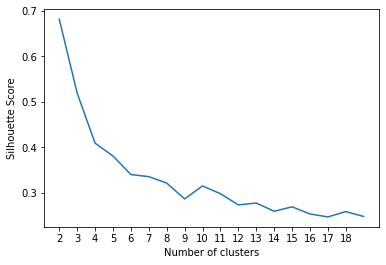

In [ ]:
print(len(silhoutte_score_list))
plt.plot([x for x in range(2, 20)], silhoutte_score_list)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks([x for x in range(2, 19)])
plt.show()